## Implemented Hough Transform

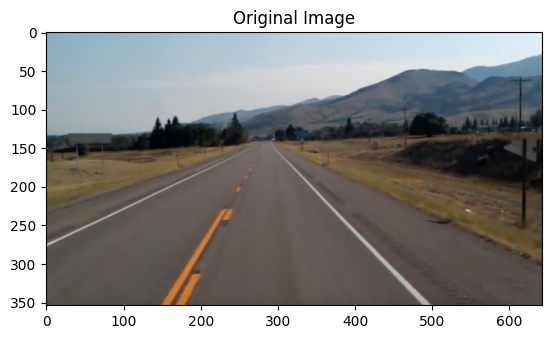

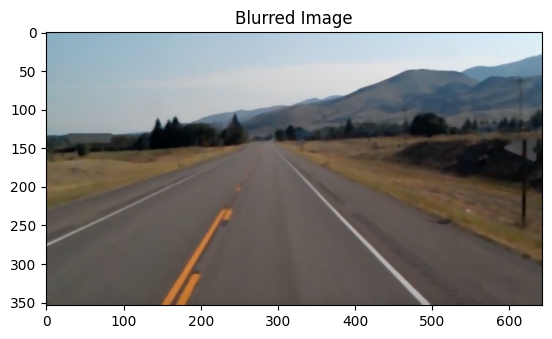

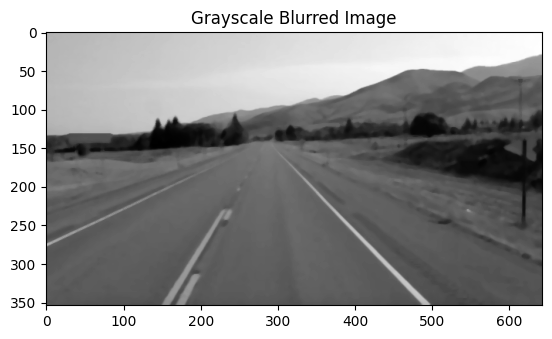

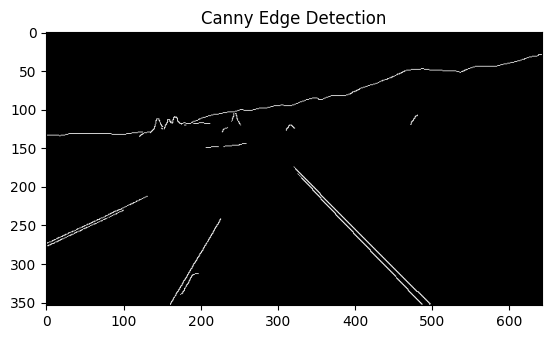

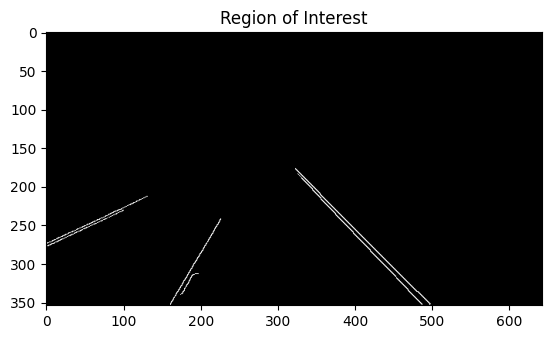

Maximum Rho:  734
Accumulator Shape:  (1468, 720)
Maximum Votes:  240


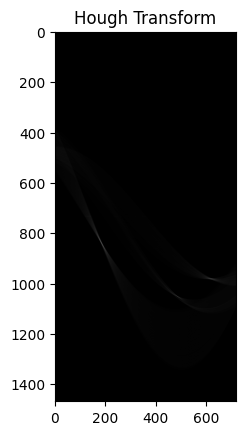

Number of Maxima:  3


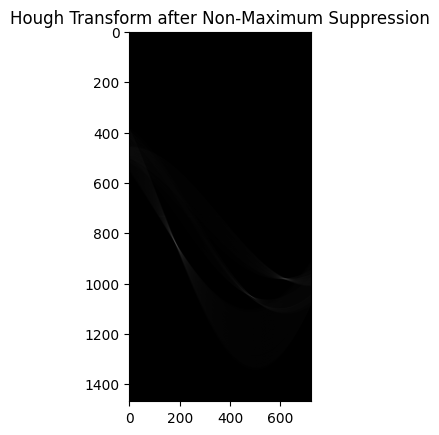

Number of Lines:  3


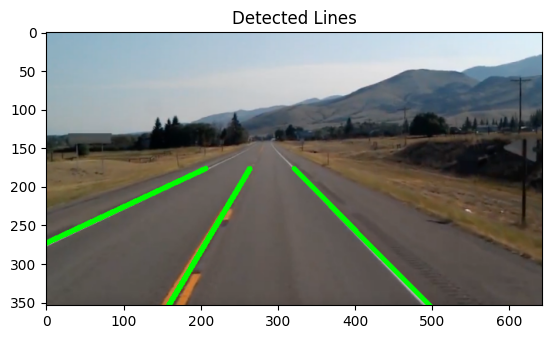

In [247]:
# Importing Libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import  math

# Utility Functions
def show_image(img, title="", cmap='viridis'):
    plt.title(title)
    plt.imshow(img, cmap=cmap)
    plt.show()

# Non-Maximum Suppression
def non_max_suppression(accumulator, threshold=50):
    # Initializing the list of maxima
    rows, cols = accumulator.shape
    maxima = []

    # Specifying Neighborhood Size
    neighborhood_size = 75
    half_neighborhood = neighborhood_size // 2

    # Looping over Accumulator
    for r in range(half_neighborhood, rows - half_neighborhood):
        for c in range(half_neighborhood, cols - half_neighborhood):
            # If Accumulator Value is Greater than Threshold
            if accumulator[r, c] > threshold:
                local_max = True
                # Checking if it is a Local Maxima
                for i in range(r - half_neighborhood, r + half_neighborhood + 1):
                    for j in range(c - half_neighborhood, c + half_neighborhood + 1):
                        if accumulator[r, c] < accumulator[i, j] and (i, j) != (r, c):
                            local_max = False
                            break
                if local_max:
                    maxima.append((r, c))
    return maxima

# Reading the Image
img = cv2.imread("images/street.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show_image(img, "Original Image")

# Blurring the Image
blurred = cv2.medianBlur(img, 5)
show_image(blurred, "Blurred Image")

# Converting to Grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_RGB2GRAY)
show_image(gray, "Grayscale Blurred Image", 'gray')

# Applying Canny Edge Detection
canny = cv2.Canny(gray, threshold1=175, threshold2=255)
show_image(canny, "Canny Edge Detection", 'gray')

# Extracting Region of Interest
height, width = canny.shape
roi = np.zeros_like(canny)
roi[int(height/2):height, 0:width-120] = canny[int(height/2):height, 0:width-120]
show_image(roi, "Region of Interest", 'gray')

# Building Hough Transform Accumulator
BINS_FOR_THETA = 0.25
BINS_FOR_RHO = 1
max_rho=int(math.sqrt(height**2+width**2))
rhos = np.arange(-max_rho, max_rho, BINS_FOR_RHO)
thetas = np.deg2rad(np.arange(-90, 90, BINS_FOR_THETA))
accumulator = np.zeros((2 * max_rho // BINS_FOR_RHO, len(thetas)), dtype=np.uint64)
print("Maximum Rho: ", max_rho)
print("Accumulator Shape: ", accumulator.shape)

# Voting in the Accumulator
y_idxs, x_idxs = np.nonzero(roi)
for i in range(len(x_idxs)):
    x= x_idxs[i]
    y= y_idxs[i]
    for theta_idx in range(len(thetas)):
        theta = thetas[theta_idx]
        rho = int((x * np.cos(theta)) + (y * np.sin(theta)))
        rho_idx = int(rho + max_rho)//BINS_FOR_RHO
        accumulator[rho_idx, theta_idx] += 1

# Plotting Hough Transform
print("Maximum Votes: ", np.max(accumulator))
show_image(accumulator, "Hough Transform", 'gray')

# Non-Maximum Suppression on Accumulator
maxima = non_max_suppression(accumulator)
print("Number of Maxima: ", len(maxima))

# Plotting Hough Transform after Non-Maximum Suppression
show_image(accumulator, "Hough Transform after Non-Maximum Suppression", 'gray')

# Extracting Lines
lines = []
for raw, theta in maxima:
    lines.append([raw, theta])
print("Number of Lines: ", len(lines))

# Plotting Lines
for i in range(len(lines)):
    
    rho = rhos[lines[i][0]]
    theta = thetas[lines[i][1]]

    a = np.cos(theta)
    b = np.sin(theta)
    slope = -a/b
    intercept = rho/b
    x0, y0 = 0, int(intercept)

    x1, y1, x2, y2 = int(x0 + 1000*(-b)), int(y0 + 1000*(a)), int(x0 - 1000*(-b)), int(y0 - 1000*(a))

    if (y1 < int(height/2)):
        y1 = int(height/2)
        x1 = int((y1 - intercept)/slope)
    if (y2 < int(height/2)):
        y2 = int(height/2)
        x2 = int((y2 - intercept)/slope)

    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 5)
show_image(img, "Detected Lines")

## Built-in Hough Transform

Number of lines:  7


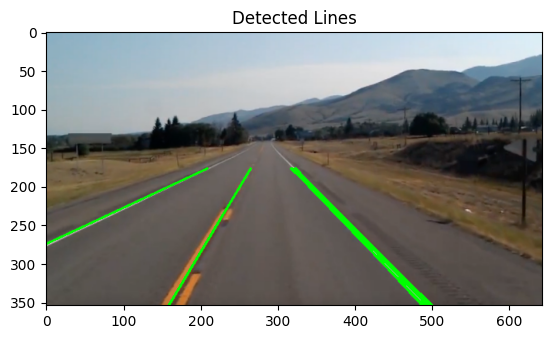

In [244]:
img = cv2.imread("images/street.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blurred = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(blurred, cv2.COLOR_RGB2GRAY)
canny = cv2.Canny(gray, threshold1=175, threshold2=255)
lines = cv2.HoughLines(canny, 1, np.pi/180, 100)
print("Number of lines: ", len(lines))
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    slope = -a/b
    intercept = rho/b
    x0 = a * rho
    y0 = b * rho
    offset = 10000
    x1 = int(x0 + offset * (-b))
    y1 = int(y0 + offset * (a))
    x2 = int(x0 - offset * (-b))
    y2 = int(y0 - offset * (a))
    if y2 < height/2:
        y2 = int(height/2)
        x2 = int((y2-intercept)/slope)
    if y1 < height/2:
        y1 = int(height/2)
        x1 = int((y1-intercept)/slope)
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

show_image(img, "Detected Lines")